<a href="https://colab.research.google.com/github/Achieng45/Machine-Learning/blob/main/officesize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [324]:
from faker import Faker
import faker.providers
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as px
import matplotlib.pyplot as go
import matplotlib.pyplot as trendline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime
import random 
fake=Faker()

In [325]:
from numpy.ma.core import array

def imbalanced_data(num=100, seed=None):
  np.random.seed(seed)
  fake.seed_instance(seed)
  

  
  output=[
          {
             "size":np.random.normal(5,2,10)[0],
             #"size":np.random.lognormal(500),
             "price":np.random.normal(10,5,9)[0],
          # "predicted_price":np.random.normal(9,9,9)[0],
             
              
             
          }
          for i in range(num)
  ]
  return output

In [326]:
 
df= pd.DataFrame(imbalanced_data(num=100,seed=0))
df

,size,price
0,8.528105,10.720218
1,3.291809,17.346794
2,4.225346,1.930511
3,5.604944,12.313911
4,3.258406,15.893898
...,...,...
95,3.724319,2.765298
96,3.154353,8.149179
97,6.980243,10.528600
98,3.718549,6.345632


In [327]:
df.plot(kind="scatter",x="size",y="price")#x and y should be equal to plot scatter


In [328]:
sized=pd.DataFrame(df['size'])
priced=pd.DataFrame(df['price'])

In [329]:
"""
linear_reg=linear_model.LinearRegression()
#added
linear_reg.fit(sized,priced)
##model=linear_reg.fit(sized,priced)
"""

'\nlinear_reg=linear_model.LinearRegression()\n#added\nlinear_reg.fit(sized,priced)\n##model=linear_reg.fit(sized,priced)\n'

In [330]:
#LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)

In [331]:
#linear_reg.predict([[100]])

In [332]:
#m=linear_reg.coef_
m

1.6035574600884448

In [333]:
#c=linear_reg.intercept_
c

0.5373148942805732

In [334]:
#linear_reg.score(sized,priced)

In [335]:
x=df['size']
y=df['price']

m=0
c=0
L=0.001
n=float(len(x))
epoch=50
for i in range(len(x)):
  predicted_price =m*x+c
  D_m = (-2/n) *sum(x * (y-predicted_price))
  D_c=(-2/n) * sum(y -predicted_price)
  m= m- L*D_m
  c=c-L*D_c
  print(m,c)


0.09713825719299653 0.019464394381302836
0.18850897787406418 0.037928569763883924
0.274453068156639 0.05545160272180401
0.3552912843970397 0.07208907803392332
0.4313254241753664 0.08789329507156626
0.5028394468817299 0.10291346198734092
0.5701005280685907 0.11719587842614404
0.6333600514840596 0.13078410743676466
0.6928545424696174 0.14371913722240057
0.7488065461879954 0.1560395333306736
0.8014254539421111 0.16778158184823141
0.8509082806532139 0.17897942413162254
0.8974403963850457 0.18966518357470577
0.9411962146301955 0.19986908488328625
0.9823398399142811 0.20961956629984957
1.0210256771225368 0.21894338519508855
1.057399004811262 0.22786571741828834
1.0915965146328566 0.23641025077546146
1.1237468188773487 0.2445992729823207
1.1539709280149402 0.252453754418663
1.1823827000126974 0.2599934259914342
1.209089263093723 0.26723685239558315
1.2341914135085281 0.2742015010447261
1.2577839897955432 0.2809038069275631
1.2799562249204157 0.2873592336308608
1.3007920776015975 0.29358233075

In [336]:
#y=m*x+b
predicted_price=m*x+c
predicted_price



0     14.212621
1      5.815919
2      7.312901
3      9.525164
4      5.762356
        ...    
95     6.509474
96     5.595502
97    11.730535
98     6.500221
99     6.579131
Name: size, Length: 100, dtype: float64

In [351]:
#predict price of 100 squareft
p=m*100+c
p

160.89306090312505

In [337]:
df['predicted_price']=predicted_price
df

,size,price,predicted_price
0,8.528105,10.720218,14.212621
1,3.291809,17.346794,5.815919
2,4.225346,1.930511,7.312901
3,5.604944,12.313911,9.525164
4,3.258406,15.893898,5.762356
...,...,...,...
95,3.724319,2.765298,6.509474
96,3.154353,8.149179,5.595502
97,6.980243,10.528600,11.730535
98,3.718549,6.345632,6.500221


In [338]:
x=pd.DataFrame(df['price'])
mse=sum([(y-df['predicted_price']**2)*1/len(df)for y in df['price']])
df_mse=pd.DataFrame({'size':df['size'],'price':df['size'],'predicted price':df['predicted_price'],'MSE':mse})
df_mse



,size,price,predicted price,MSE
0,8.528105,8.528105,14.212621,-192.266393
1,3.291809,3.291809,5.815919,-24.092717
2,4.225346,4.225346,7.312901,-43.746318
3,5.604944,5.604944,9.525164,-80.996558
4,3.258406,3.258406,5.762356,-23.472546
...,...,...,...,...
95,3.724319,3.724319,6.509474,-32.641058
96,3.154353,3.154353,5.595502,-21.577443
97,6.980243,6.980243,11.730535,-127.873260
98,3.718549,3.718549,6.500221,-32.520678


In [347]:
def gradient_descent_fit(m,c,n,L):
 epoch_error_list=[]
 epoch_count_list=[]
 for i in range(epoch):
    predicted_price=m*x+c
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error=mse(n,y,predicted_price)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    D_m = (-2/n) *sum(x * (y-predicted_price))
    D_c=(-2/n) * sum(y -predicted_price)
    m= m- L*D_m
    c=c-L*D_c
    print(m,c)

 return predicted_price,epoch_count_list,epoch_error_list

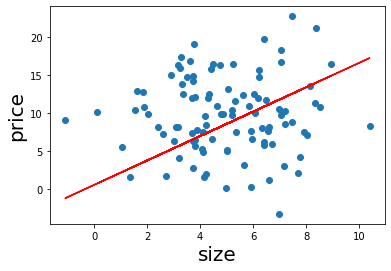

In [343]:
%matplotlib inline
plt.xlabel('size',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df['size'],df['price'])
plt.plot(df['size'],df['predicted_price'],color="red")

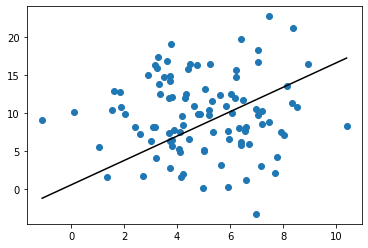

In [345]:
x=df['size']
y=df['price']
Fig=px.scatter(x,y)
Fig=px.plot([min(x),max(x)],[min(df['predicted_price']),max(df['predicted_price'])],color='black')



